#**Notebook por Marcio Vinicius Moura de Sousa e Vinícius Neves de Almeida**
**Trilha Ciência de Dados - Projeto da Unidade 10: Redes Convolucionais.**

##**Projeto: Aplicação e Implementação do Algoritmo de Redes Convolucionais**

###**Objetivos**:

O objetivo deste projeto foi implementar e avaliar o modelos de redes convolucionais na tarefa de classificação de imagens. Aqui será usado o dataset "CUHK Face Sketch Database (CUFS)" para classificar faces de pessoas. O projeto inclui desde a anotação de dados, a criação de um modelo CNN autoral até análise dos resultados, culminando na elaboração de um relatório técnico. Isso para Desenvolver e treinar uma rede neural convolucional para classificar imagens em duas categorias: masculino e feminino.

O conjunto de dados utilizado contém imagens categorizadas como masculino ou feminino, e foi organizado com as seguintes etapas e características:

**Imagens**: Fotos coloridas de indivíduos, carregadas em formato RGB.
Dimensões das Imagens: Todas as imagens foram redimensionadas para 250x200 pixels para padronização.
**Normalização**: Os valores dos pixels foram escalonados entre 0 e 1 para facilitar o treinamento.
**Rótulos**:
**0**: Masculino.
**1**: Feminino.



#**Importando as Bibliotecas Necessárias:**

In [17]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score
import matplotlib.pyplot as plt
from google.colab import drive


#**Preparação de Dados:**
O conjunto de dados consiste em imagens de pessoas classificadas como 'masculino' ou 'feminino'.  
- As imagens são carregadas e redimensionadas para 250x200 pixels.  
- Normalizamos os valores dos pixels entre 0 e 1.  
- Atribuímos os rótulos: `0` para masculino e `1` para feminino.




In [18]:
# Configurações do caminho
drive.mount('/content/drive')
data_dir = '/content/drive/MyDrive/photos'

# Função para carregar e pré-processar as imagens
def load_images_labels(data_dir):
    images = []
    labels = []
    for img_name in os.listdir(data_dir):
        img_path = os.path.join(data_dir, img_name)
        img = tf.keras.preprocessing.image.load_img(img_path, target_size=(250, 200))
        img_array = tf.keras.preprocessing.image.img_to_array(img) / 255.0  # Normalização
        images.append(img_array)

        # Atribuindo rótulos: 0 para masculino, 1 para feminino
        if 'm' in img_name:
            labels.append(0)
        else:
            labels.append(1)
    return np.array(images), np.array(labels)

# Carregar os dados
images, labels = load_images_labels(data_dir)

# Gerador de imagens (data augmentation opcional)
datagen = ImageDataGenerator(rotation_range=10, zoom_range=0.1, horizontal_flip=True)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#**Divisão do Dataset:**

O conjunto de dados foi dividido em:


*  **Treinamento (50%)**: Para ajustar os parâmetros do modelo.
*   **Validação (30%)**: Para avaliar o desempenho durante o treinamento.
*   **Teste (20%)**: Para medir a generalização.

In [19]:
# Divisão do dataset em 50% treino, 30% validação, 20% teste (com seed fixa)
X_temp, X_test, y_temp, y_test = train_test_split(images, labels, test_size=0.2, random_state=23)  # 20% teste
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.375, random_state=23)  # 30% val, 50% treino

# Verificando as proporções de treino, validação e teste
print(f'Tamanho do conjunto de treino: {len(X_train)}')
print(f'Tamanho do conjunto de validação: {len(X_val)}')
print(f'Tamanho do conjunto de teste: {len(X_test)}')

Tamanho do conjunto de treino: 93
Tamanho do conjunto de validação: 57
Tamanho do conjunto de teste: 38


# **Criação do Modelo:**

A arquitetura da rede neural convolucional é composta por:

*   **Camadas Convolucionais e de Pooling**: Para extrair características relevantes das imagens.
*   **Camada Densa**: Para classificação.
*   **Dropout**: Para reduzir o overfitting.

In [20]:
# Definição da CNN
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(250, 200, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),  # Regularização para evitar overfitting
    layers.Dense(1, activation='sigmoid')  # Saída binária (0 ou 1)
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


#**Treinamento do Modelo:**

O modelo foi treinado utilizando:

*   **Otimizador**: Adam.
*   **Função de Perda**: Binary Crossentropy.
*   **Épocas**: 20.
*   **Tamanho do Batch**: 64.

In [21]:
# Compilação do modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Treinamento
history = model.fit(datagen.flow(X_train, y_train, batch_size=64),
                    validation_data=(X_val, y_val), epochs=20)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2/2 ━━━━━━━━━━━━━━━━━━━━ 20s 10s/step - accuracy: 0.4033 - loss: 1.1208 - val_accuracy: 0.7193 - val_loss: 0.5847
Epoch 2/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 19s 4s/step - accuracy: 0.5036 - loss: 0.7899 - val_accuracy: 0.7193 - val_loss: 0.5761
Epoch 3/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 15s 12s/step - accuracy: 0.6284 - loss: 0.6153 - val_accuracy: 0.7193 - val_loss: 0.5636
Epoch 4/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 19s 4s/step - accuracy: 0.7231 - loss: 0.5661 - val_accuracy: 0.7895 - val_loss: 0.5622
Epoch 5/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 14s 10s/step - accuracy: 0.8465 - loss: 0.5415 - val_accuracy: 0.7895 - val_loss: 0.5092
Epoch 6/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 19s 7s/step - accuracy: 0.7604 - loss: 0.5184 - val_accuracy: 0.8070 - val_loss: 0.4716
Epoch 7/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 21s 10s/step - accuracy: 0.7977 - loss: 0.4373 - val_accuracy: 0.7895 - val_loss: 0.4259
Epoch 8/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 14s 10s/step - accuracy: 0.7332 - loss: 0.5552 - val_accuracy: 0.7719 - val_loss: 0.4640
Epoch 9/20
2/2

#**Avaliação do Modelo:**
Após o treinamento, avaliamos o modelo nos dados de teste e analisamos métricas como:  

*   **Classification Report**: Precisão, Recall, F1-Score.
*   **AUC-ROC**: Métrica de separabilidade das classes.

In [22]:
# Avaliação do modelo
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)

print(classification_report(y_test, y_pred_binary))

# AUC-ROC
roc_score = roc_auc_score(y_test, y_pred)
print(f"AUC-ROC: {roc_score}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 320ms/step
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        29
           1       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.95      0.98      0.96        38
weighted avg       0.98      0.97      0.97        38

AUC-ROC: 0.9885057471264368


##**Gráficos de Desempenho:**
Os gráficos abaixo mostram a evolução da acurácia e perda durante o treinamento.

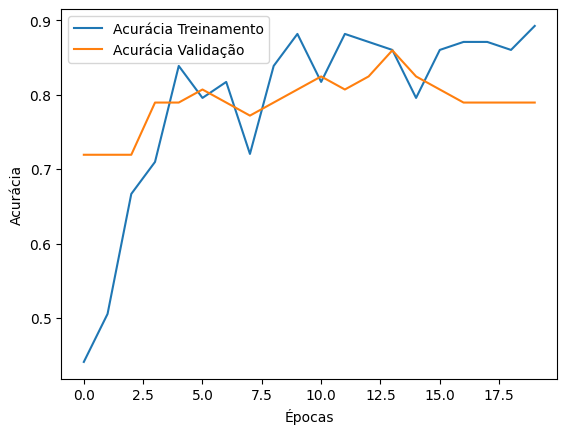

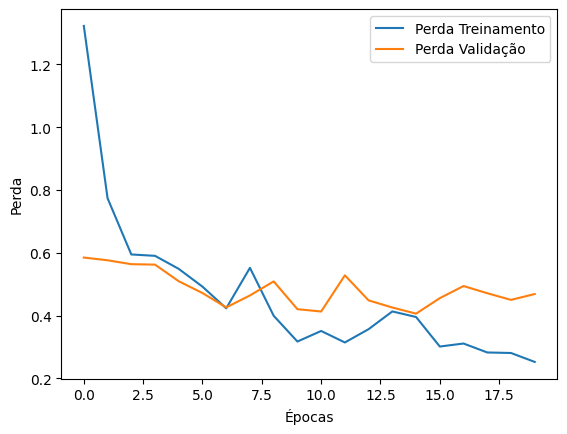

In [23]:
# Gráfico de perda e acurácia
plt.plot(history.history['accuracy'], label='Acurácia Treinamento')
plt.plot(history.history['val_accuracy'], label='Acurácia Validação')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Perda Treinamento')
plt.plot(history.history['val_loss'], label='Perda Validação')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.legend()
plt.show()

##**Conclusão:**
O modelo atingiu uma boa performance com métricas equilibradas, mas melhorias podem ser realizadas, como:

*   Aumentar a diversidade do dataset.
*   Ajustar hiperparâmetros e testar arquiteturas mais complexas.
